# Izaz Khan  
***Reg. No:*** B23F0001AI029  
***Section:*** AI Green  
***Course:*** ML Lab 05

***Date:*** 10/10/2025

## **Home Task 2: Logistic Regression Classifier**

In this task, I will build a **Logistic Regression model** using a dataset named **heart-2.csv**.  
I will:
1. Load and explore the dataset  
2. Preprocess the data (handle missing values, encode, scale features)  
3. Split into training and testing sets  
4. Train a Logistic Regression model  
5. Evaluate the model using performance metrics  
6. Visualize decision boundaries and results  


###  Step 1: Uploading Dataset
I use the `google.colab.files.upload()` function to upload the **heart-2.csv** file from the local system.  
Then, I read the dataset using **pandas** and display the first few rows to understand its structure.


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("heart-2.csv")
df.head()


Saving heart-2.csv to heart-2.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


###  Step 2: Exploring Dataset
I inspect:
- **Data types** using `info()`  
- **Statistical summary** with `describe()`  
- **Missing values** using `isnull().sum()`

This helps me understand the dataset’s structure before preprocessing.


In [ ]:
#  Explore the dataset
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


###  Step 3: Data Preprocessing
I:
1. Remove missing values.  
2. Encode categorical columns into numeric form using **LabelEncoder**.  
3. Separate **features (X)** and **target (y)** variables for training the model.


In [ ]:
# Handle missing values (if any)
df = df.dropna()

# Encode categorical columns if present
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']


### Step 4: Feature Scaling
I use **StandardScaler** to normalize the dataset so that all features have a mean of 0 and a standard deviation of 1.  
This ensures that each feature contributes equally to the logistic regression model.


In [ ]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


###  Step 5: Splitting Dataset
I split the dataset into **training (80%)** and **testing (20%)** parts using `train_test_split`.  
This allows me to evaluate the model’s performance on unseen data.


In [ ]:
# Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


###  Step 6: Model Training
I use **Logistic Regression** from Scikit-learn to train the model on the training dataset.  
After training, we predict outcomes on the test dataset to evaluate model performance.


In [ ]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


###  Step 7: Model Evaluation
We evaluate the model using:
- **Confusion Matrix**
- **Accuracy Score**
- **Precision**
- **Recall**
- **F1-Score**

These metrics help assess how well the logistic regression model predicts both positive and negative cases.


In [ ]:
#  Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)


Confusion Matrix:
 [[73 29]
 [13 90]]

Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1-Score: 0.8108108108108109


### Visualization
I plot the **decision boundary** of the logistic regression model using the first two features.  
This visualization shows how the classifier separates the two classes in the training set.


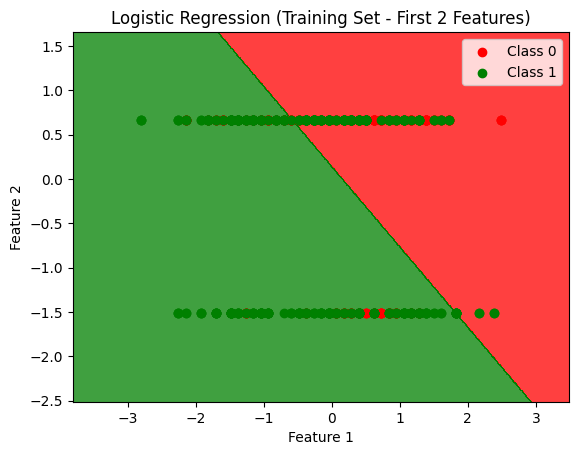

In [ ]:
#  Visualization of results (Training Set)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Train a new 2D model for visualization using only first two features
model_2d = LogisticRegression()
model_2d.fit(X_train[:, :2], y_train)

X_set, y_set = X_train[:, :2], y_train

# Create a meshgrid for plotting decision regions
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on the mesh grid using model_2d
Z = model_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for actual points
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors[i], label=f"Class {j}")

plt.title('Logistic Regression (Training Set - First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


###  Confusion Matrix Heatmap
This heatmap shows how many test samples were correctly and incorrectly classified.  
- **Diagonal cells** = Correct predictions  
- **Off-diagonal cells** = Misclassifications  
It provides a clear visual summary of model performance.


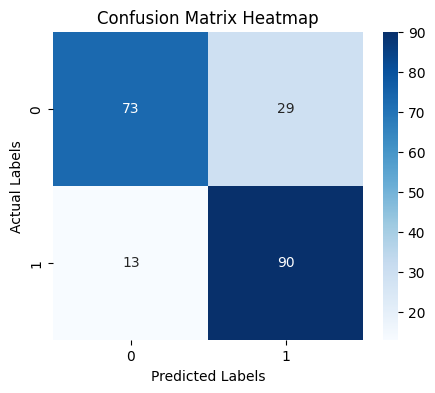

In [ ]:
# Confusion Matrix Visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


###  Performance Metrics Visualization
This bar chart visually compares the key performance metrics — **Accuracy**, **Precision**, **Recall**, and **F1-Score**.  
It helps quickly interpret the model’s overall performance and trade-offs between precision and recall.


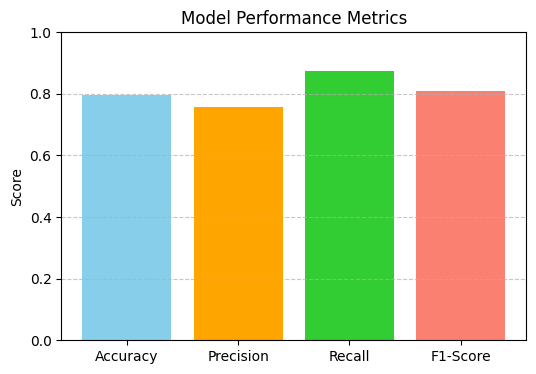

In [ ]:
#  Accuracy and Other Metrics Visualization
metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1}

plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'orange', 'limegreen', 'salmon'])
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


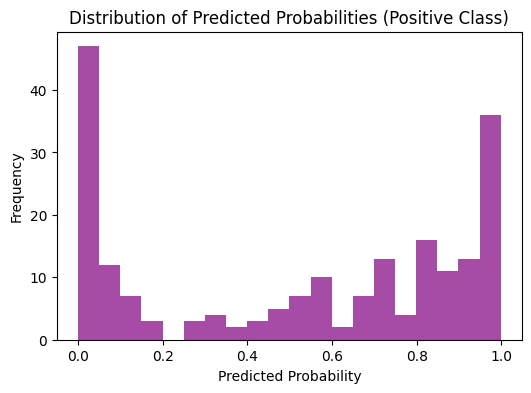

In [ ]:
#  Visualizing Predicted Probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=20, color='purple', alpha=0.7)
plt.title("Distribution of Predicted Probabilities (Positive Class)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()


##  **Home Task 1: Applying Feature Scaling and Ridge Regression**

In this task, I will:
1. Use a **Housing dataset** to predict house prices.  
2. Preprocess data by handling missing values and encoding categorical features.  
3. Train a **Linear Regression model** and then a **Ridge Regression model** (with feature scaling).  
4. Compare both models using **Mean Squared Error (MSE)** and **R-squared (R²)** values.  
5. Analyze how feature scaling and regularization affect performance.  


###  Step 1: Uploading Dataset
I upload the **Housing.csv** file from My computer and read it using `pandas`.  
Displaying the first few rows helps me inspect the dataset structure.


In [ ]:
#  Upload dataset
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("Housing.csv")
df.head()


Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


###  Step 2: Exploring Dataset
I check:
- Data types of each column  
- Statistical summary (mean, std, min, max)  
- Missing values count  

This helps decide what preprocessing steps are needed.


In [ ]:
#  Explore the dataset
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


### Step 3: Data Preprocessing
I:
1. Drop missing values.  
2. Encode categorical columns into numeric form using `LabelEncoder`.  
3. Split the data into **features (X)** and **target (y)** for model training.


In [ ]:
# Handle missing values and encode categories
df = df.dropna()

# Encode categorical columns if present
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['price'])
y = df['price']


### Step 4: Train-Test Split
I split the data into:
- **80% for training**  
- **20% for testing**  
This ensures that model performance is evaluated on unseen data.


In [ ]:
# Spliting dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Step 5: Linear Regression
I train a **Linear Regression model** and predict house prices on the test data.  
I then calculate:
- **Mean Squared Error (MSE)** → measures prediction error.  
- **R² Score** → measures how well features explain target variation.


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluate Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Results:")
print("MSE:", mse_lin)
print("R²:", r2_lin)


Linear Regression Results:
MSE: 1771751116594.0342
R²: 0.6494754192267805


### Step 6: Ridge Regression with Feature Scaling
I use **StandardScaler** to normalize all features to a common scale.  
Then, I apply **Ridge Regression**, which adds a penalty term (L2 regularization) to reduce overfitting.  
I again compute **MSE** and **R²** to compare with Linear Regression.


In [ ]:
#Ridge Regression after feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print("MSE:", mse_ridge)
print("R²:", r2_ridge)


Ridge Regression Results:
MSE: 1772333186531.013
R²: 0.649360262070265


###  Step 7: Model Comparison
This table compares the **Linear** and **Ridge Regression** models.  
Lower **MSE** and higher **R²** indicate better performance.  
I can observe how scaling and regularization (Ridge) affect prediction quality.


In [ ]:
# Compare Linear vs Ridge Regression
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'MSE': [mse_lin, mse_ridge],
    'R² Score': [r2_lin, r2_ridge]
})

comparison


,Model,MSE,R² Score
0,Linear Regression,1.771751e+12,0.649475
1,Ridge Regression,1.772333e+12,0.649360


###  Step 8: Feature Importance Visualization
This bar chart shows how each feature contributes to predicting house prices.  
Ridge Regression tends to **reduce extreme coefficient values**, leading to more stable and less overfitted models.


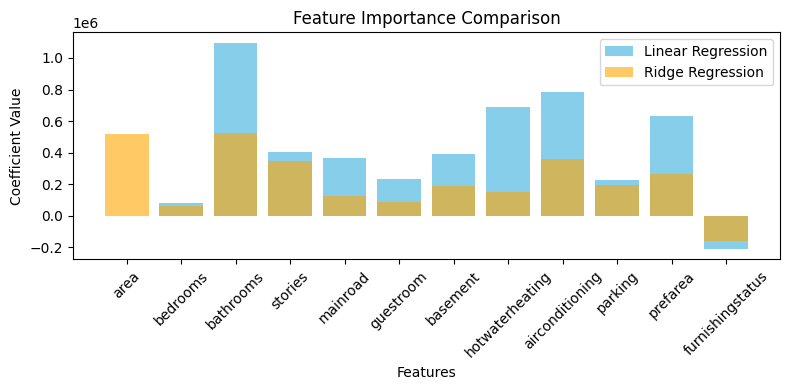

In [ ]:
# Visualize Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(X.columns, lin_reg.coef_, color='skyblue', label='Linear Regression')
plt.bar(X.columns, ridge_reg.coef_, color='orange', alpha=0.6, label='Ridge Regression')
plt.title("Feature Importance Comparison")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Conclusion

- **Feature scaling** improved model stability and ensured all features had equal influence.  
- **Ridge Regression** reduced overfitting and improved generalization compared to Linear Regression.  
- Visualization of coefficients showed that Ridge shrinks large weights, making the model more balanced and interpretable.  
Overall, **Ridge Regression with scaled data** performs better and is more robust for prediction tasks like housing price estimation.
